In [ ]:
# Seleccionar un problema e indentificar un objetivo

"""
Una película comercial por lo general entretiene al público y genera grandes
ingresos en taquillas para las compañías cinematográficas. Hay diferentes
factores que garantizan el éxito, por ejemplo, grandes directores y actores. Sin
embargo, ha sucedido que películas con grandes actores y directores no han tenido
el éxito esperado en cuanto a taquilla y calificación IMDB.

Basándonos en una base de datos con diferente información relacionada a películas
queremos comprender los factores más importantes que determinan el éxito de una
película. Por lo tanto, analizaremos qué género de película es más exitoso, en
pocas palabras cuáles tiene la calificación IMDB más alta.

IMDB_Score   Clasificación
1-3          Mala
3-6          Aceptable
6-10         Éxito

"""

'\nUna película comercial por lo general entretiene al público y genera grandes\ningresos en taquillas para las compañías cinematográficas. Hay diferentes\nfactores que garantizan el éxito, por ejemplo, grandes directores y actores. Sin\nembargo, ha sucedido que películas con grandes actores y directores no han tenido\nel éxito esperado en cuanto a taquilla y calificación IMDB.\n\nBasándonos en una base de datos con diferente información relacionada a películas\nqueremos comprender los factores más importantes que determinan el éxito de una\npelícula. Por lo tanto, analizaremos qué género de película es más exitoso, en\npocas palabras cuáles tiene la calificación IMDB más alta.\n\nIMDB_Score   Clasificación\n1-3          Mala\n3-6          Aceptable\n6-10         Éxito\n\n'

In [ ]:
#1. Carga del dataset:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Importar el dataset
dataset = pd.read_csv('/content/movie_metadata.csv')

#2. Revisión general de los datos
dataset.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0


In [ ]:
dataset.shape

(5043, 28)

In [ ]:
dataset.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
# Data profile

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
# Tratamiento de datos faltantes

dataset.isnull().sum()



,0
color,19
director_name,104
num_critic_for_reviews,50
duration,15
director_facebook_likes,104
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,884
genres,0


In [ ]:
numerical_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']
categorical_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']
numerical_cols, categorical_cols


(['num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'cast_total_facebook_likes',
  'facenumber_in_poster',
  'num_user_for_reviews',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'],
 ['num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'cast_total_facebook_likes',
  'facenumber_in_poster',
  'num_user_for_reviews',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'])

In [ ]:
dataset[numerical_cols].describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
dataset.color.unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [ ]:
color_mode = dataset ['color'].mode().iloc[0]
dataset.color.fillna(color_mode, inplace=True),
dataset.color.isnull().sum()

<ipython-input-11-605dbcdf9b0a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.color.fillna(color_mode, inplace=True),


0

In [ ]:
dataset.shape

(5043, 28)

In [ ]:
dataset.director_name.nunique(), dataset.director_name.isnull().sum()

(2398, 104)

In [ ]:
dataset = dataset.dropna(axis=0 , subset=['director_name'])
dataset.shape

(4939, 28)

In [ ]:
dataset.num_critic_for_reviews.min(), dataset.num_critic_for_reviews.max(), dataset.num_critic_for_reviews.median()


(1.0, 813.0, 112.0)

In [ ]:
 dataset.drop_duplicates()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,Color,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0$,2011.0,205.0,6.4,NaN,413
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,0.0$,2013.0,470.0,7.7,NaN,84
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0$,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,0.0$,2012.0,719.0,6.3,2.35,660


In [ ]:
dataset.shape

(4939, 28)

In [ ]:
#3. Busqueda y eliminación de duplicados
# Cuantos duplicados hay

duplicados = dataset.duplicated().sum()
print(f'Hay {duplicados} registros duplicados')



Hay 44 registros duplicados


In [ ]:
repetidos = dataset[dataset.duplicated()]
print(repetidos)


                 color         director_name  num_critic_for_reviews  \
137              Color           David Yates                   248.0   
187              Color           Bill Condon                   322.0   
204              Color          Hideaki Anno                     1.0   
303              Color            Joe Wright                   256.0   
389              Color            Josh Trank                   369.0   
395              Color             Rob Cohen                   187.0   
590              Color          Brett Ratner                   245.0   
656              Color        Paul Verhoeven                   196.0   
794              Color           Joss Whedon                   703.0   
1220             Color   Angelina Jolie Pitt                   322.0   
1305             Color         Paul McGuigan                   159.0   
1449             Color         Albert Hughes                   208.0   
2169             Color         Paul McGuigan                    

In [ ]:
#Eliminar los datos duplicados

dataset_sin_duplicados = dataset.drop_duplicates()
print (dataset_sin_duplicados)

#Verificar que no hayan duplicados

duplicados_restantes = dataset_sin_duplicados.duplicated().sum()
print(f'Hay {duplicados_restantes} registros duplicados')

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4     Color        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5037  Color       Edward Burns                    14.0      95.0   
5038  Color        Scott Smith                     1.0      87.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0

In [ ]:
#4. Identificación de valores nulos
#Qué columnas tienen valores nulos y cuantos valores nulos hay en cada columna

faltantes = dataset.isnull().sum()
print ("Valores faltantes por columna en el Dataframe:")
print (faltantes)



Valores faltantes por columna en el Dataframe:
color                          0
director_name                  0
num_critic_for_reviews        45
duration                      13
director_facebook_likes        0
actor_3_facebook_likes        20
actor_2_name                  11
actor_1_facebook_likes         7
gross                        783
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  20
facenumber_in_poster          13
plot_keywords                144
movie_imdb_link                0
num_user_for_reviews          19
language                      13
country                        3
content_rating               265
budget                         0
title_year                     4
actor_2_facebook_likes        11
imdb_score                     0
aspect_ratio                 310
movie_facebook_likes           0
dtype: int64


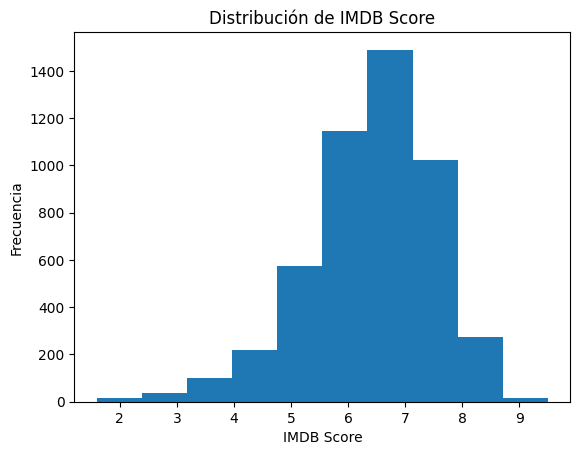

In [ ]:
#5. Visualización de Variables:

# Crea un histograma que muestre la distribución de la variable imdb_score.

import matplotlib.pyplot as plt

plt.hist(dataset_sin_duplicados.imdb_score)
plt.xlabel('IMDB Score')
plt.ylabel('Frecuencia')
plt.title('Distribución de IMDB Score')
plt.show()


En este histograma se analizó la variable **"IMDB Score"** (Internet movie database) para conocer las puntuaciones que reciben las películas por el público, de esta manera podemos observar que la puntuación que más se repite y su respectiva frecuencia. También podemos decir que la distribución de los datos que se obtiene es asimetrica, indicando que las calificaciones están mayormente concentradas en un lado de la media, y que hay pocas películas con puntuaciones extremadamente altas o bajas.


Text(0.5, 1.0, 'Top 10 Géneros de películas')

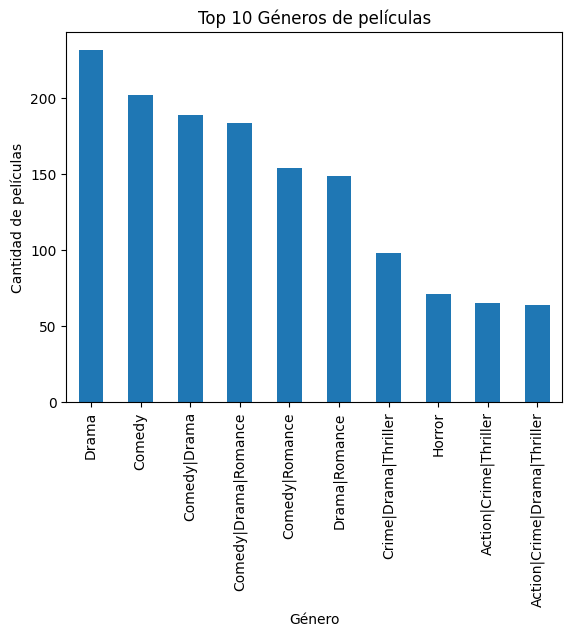

In [ ]:
# Realiza un gráfico de barras para visualizar la cantidad de películas por género (genres).

dataset ['genres'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.title('Top 10 Géneros de películas')


En este gráfico de barras podemos ver, según el género de cada película, cual tiene una mayor cantidad de películas, de esta manera podemos ver que la mayor parte se encuentra en películas de drama, seguidas de las comedias y en tercer lugar una combinación entre el drama y la comedia. Este gráfico es muy útil para comparar categorías e identificar patrones, tendencias y resaltar valores máximos y mínimos.

              budget     gross  imdb_score
budget      1.000000  0.107989    0.030064
gross       0.107989  1.000000    0.199432
imdb_score  0.030064  0.199432    1.000000


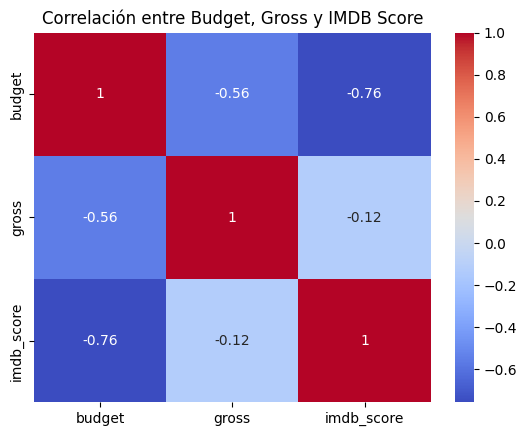

In [ ]:
# 6. Análisis de Correlaciones:

#Corrección de Budget

dataset['budget'] = dataset['budget'].str.replace('$', '', regex=False)
dataset['budget'] = dataset['budget'].str.replace(',', '', regex=False)

# Calcula y muestra la correlación entre budget, gross y imdb_score.

dataset ['budget'] = pd.to_numeric(dataset['budget'], errors='coerce')
dataset ['gross'] = pd.to_numeric(dataset['gross'], errors='coerce')
dataset ['imdb_score'] = pd.to_numeric(dataset['imdb_score'], errors='coerce')

correlation_data = dataset [['budget', 'gross', 'imdb_score']].corr()
corr_matrix = correlation_data.corr()
corr = corr_matrix.corr()
print(correlation_data)

# Usa un mapa de calor para visualizar las correlaciones.

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre Budget, Gross y IMDB Score')
plt.show()




Los gráficos de calor van a permitir identificar rápidamente patrones de correlación entre las variables y es principalmente empleada en la generación de modelos predictivos. En este caso específico se muestra la correlación entre las variables "budget", "gross" y "imdb_score", y cada celda en el nos indica el coeficiente de correlación entre dos variables específicas.

1. Correlación entre budget y gross: La celda correspondiente tiene un valor de -0.56 (relación negativa), esto significa que, a medida que aumenta el presupuesto (budget), la ganancia bruta (gross) tiende a disminuir.

2. Correlación entre budget y imdb_score: La correlación es de -0.76 (relación negativa), esto sugiere que un mayor presupuesto tiende a estar asociado con una menor puntuación en IMDB.

3. Correlación entre gross e imdb_score: Esta es de -0.12, lo cual muestra una relación negativa muy débil. Esto indica que la ganancia bruta no está fuertemente relacionada con la puntuación de IMDB.



<Axes: title={'center': 'IMDB Score vs Budget'}, xlabel='imdb_score', ylabel='budget'>

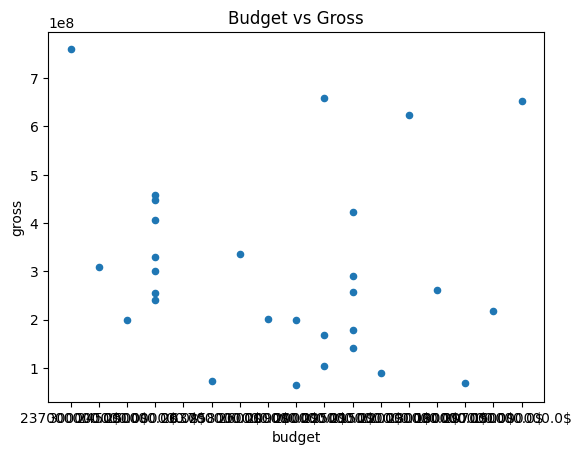

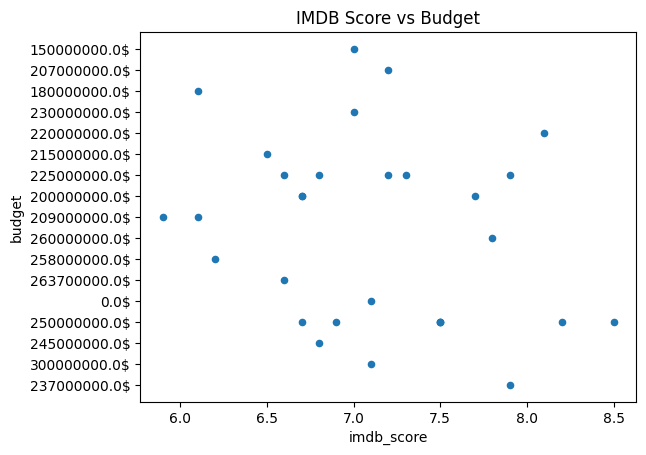

In [ ]:
# 7. Gráficos de Dispersión:

# Crea un gráfico de dispersión para analizar la relación entre budget y gross.

top_30_data = dataset_sin_duplicados.head(30)
top_30_data.plot(kind='scatter', x='budget', y='gross', title='Budget vs Gross')

# Haz un gráfico de dispersión entre imdb_score y budget.

top_30_data.plot(kind='scatter', x='imdb_score', y='budget', title='IMDB Score vs Budget')




Los gráficos de dispersión sirven para analizar la relación existente entre dos variables, la dispersión de los datos y analizar tendencias, de manera que se genera una dispersión positiva o negativa, sin embargo, para los resultados de este caso, teniendo en cuenta 30 valores, es difícil afirmar que exista una relación entre las variables graficadas.
1. En cuanto al gráfico que relaciona "budget" contra "gross", podríamos decir que una relación positiva indicaría que aquellas películas con mayor presupuesto tienden a aumentar sus ganancias.
2. En cuanto al gráfico que relaciona "imdb score" y "budget", podríamos decir que una relación positiva indicaría que aquellas películas con mayor presupuesto suelen tener una mejor puntuación del público. Pero una ausencia de patrón nos indica que la puntuación no tiene relación con el presupuesto invertido.

In [ ]:
#Descargar el archivo limpio

dataset_sin_duplicados.to_csv('/content/DatasetEDA_limpio.csv', index = False, encoding = "utf-8" )
df = pd.read_csv('/content/DatasetEDA_limpio.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4895 non-null   object 
 1   director_name              4895 non-null   object 
 2   num_critic_for_reviews     4851 non-null   float64
 3   duration                   4882 non-null   float64
 4   director_facebook_likes    4895 non-null   float64
 5   actor_3_facebook_likes     4875 non-null   float64
 6   actor_2_name               4884 non-null   object 
 7   actor_1_facebook_likes     4888 non-null   float64
 8   gross                      4121 non-null   float64
 9   genres                     4895 non-null   object 
 10  actor_1_name               4888 non-null   object 
 11  movie_title                4895 non-null   object 
 12  num_voted_users            4895 non-null   int64  
 13  cast_total_facebook_likes  4895 non-null   int64

In [ ]:
#Cargar el nuevo archivo
dataset_1 = pd.read_csv('/content/DatasetEDA_limpio.csv')
dataset_1.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,Color,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0


In [ ]:
#Visualizar cuales son los datos faltantes

faltantes_1 = dataset_1.isnull().sum()
print ("Valores faltantes por columna en el Dataframe:")
print (faltantes_1)

Valores faltantes por columna en el Dataframe:
color                          0
director_name                  0
num_critic_for_reviews        44
duration                      13
director_facebook_likes        0
actor_3_facebook_likes        20
actor_2_name                  11
actor_1_facebook_likes         7
gross                        774
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  20
facenumber_in_poster          13
plot_keywords                143
movie_imdb_link                0
num_user_for_reviews          19
language                      13
country                        3
content_rating               263
budget                         0
title_year                     4
actor_2_facebook_likes        11
imdb_score                     0
aspect_ratio                 308
movie_facebook_likes           0
dtype: int64


In [ ]:
#Eliminar los datos faltantes

dataset_sin_nulos = dataset_1.dropna()
print (dataset_sin_nulos)



      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
5     Color     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
4879  Color    Olivier Assayas                    81.0     110.0   
4880  Color       Jafar Panahi                    64.0      90.0   
4886  Color      Shane Carruth                   143.0      77.0   
4888  Color   Robert Rodriguez                    56.0      81.0   
4894  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
0                         0.0                   855.0   Joel David Moore   
1                       563.0  

In [ ]:
#Verificar que ya no hayan faltantes

faltantes_2 = dataset_sin_nulos.isnull().sum()
print ("Valores faltantes por columna en el Dataframe:")
print (faltantes_2)



Valores faltantes por columna en el Dataframe:
color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64


In [ ]:
#Descargar el nuevo archivo totalmente limpio

dataset_sin_nulos.to_csv('/content/DatasetEDA_muylimpio.csv', index = False, encoding = "utf-8" )
df = pd.read_csv('/content/DatasetEDA_muylimpio.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3941 non-null   object 
 1   director_name              3941 non-null   object 
 2   num_critic_for_reviews     3941 non-null   float64
 3   duration                   3941 non-null   float64
 4   director_facebook_likes    3941 non-null   float64
 5   actor_3_facebook_likes     3941 non-null   float64
 6   actor_2_name               3941 non-null   object 
 7   actor_1_facebook_likes     3941 non-null   float64
 8   gross                      3941 non-null   float64
 9   genres                     3941 non-null   object 
 10  actor_1_name               3941 non-null   object 
 11  movie_title                3941 non-null   object 
 12  num_voted_users            3941 non-null   int64  
 13  cast_total_facebook_likes  3941 non-null   int64